# Tasks for laboratory assignment 3

In [38]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns


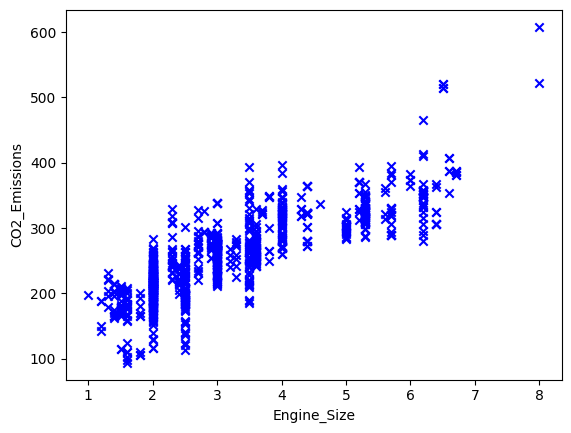

In [2]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [4]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    return pd.read_csv(file_path)

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

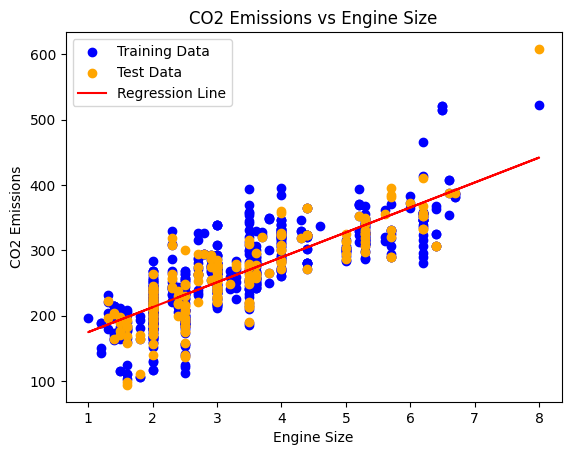

{'Coefficient': 38.14987792076484, 'Intercept': 136.5788813144195}

In [12]:
def CO2_emissions(data):
    """
    Build a model that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

    Args:
        data: CO2 emissions data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data[['Engine_Size']].values
    y = data['CO2_Emissions'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    plt.scatter(X_train, y_train, color="blue", label="Training Data")
    plt.scatter(X_test, y_test, color="orange", label="Test Data")
    plt.plot(X, model.predict(X), color="red", label="Regression Line")
    plt.xlabel("Engine Size")
    plt.ylabel("CO2 Emissions")
    plt.title("CO2 Emissions vs Engine Size")
    plt.legend()
    plt.show()
    
    return {"Coefficient": model.coef_[0], "Intercept": model.intercept_}

data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

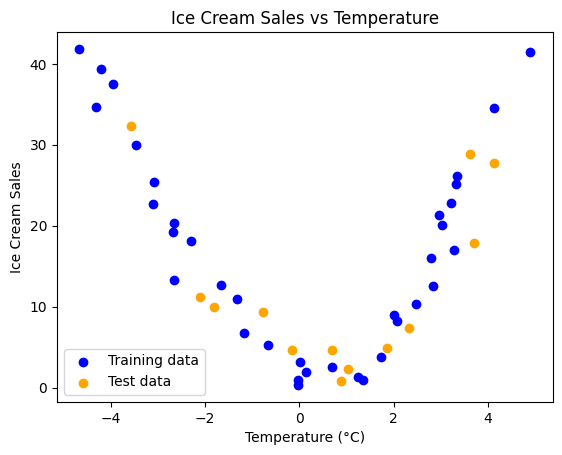

R2 Score: 0.8448
Mean Squared Error: 16.5518


[1.0]

In [18]:
def ice_cream_selling(data):
    """
    Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data[['Temperature (°C)']].values
    y = data['Ice Cream Sales (units)'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    plt.scatter(X_train, y_train, color="blue", label="Training data")
    plt.scatter(X_test, y_test, color="orange", label="Test data")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Ice Cream Sales")
    plt.title("Ice Cream Sales vs Temperature")
    plt.legend()
    plt.show()

    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

    return model.feature_importances_.tolist()

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

R2 Score: 0.4559


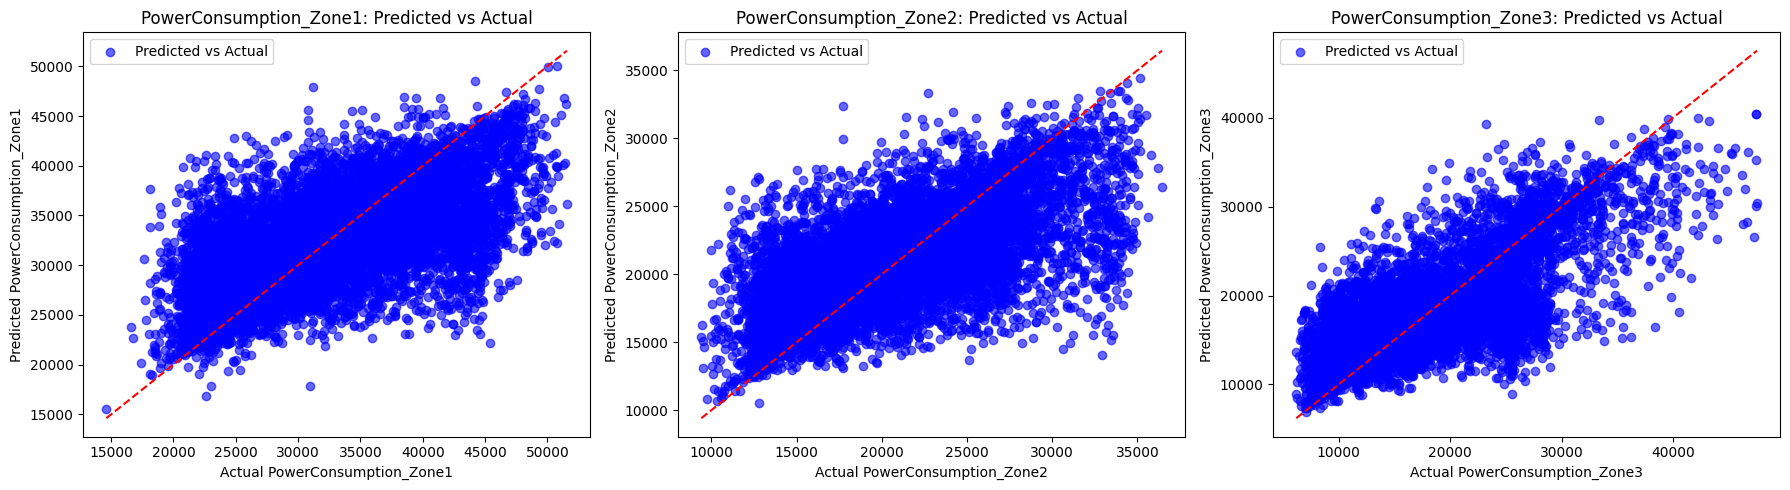

[0.4958309404912022, 0.31683671341509717, 0.18733234609370064]

In [21]:
def power_consumption(data):
    """
    Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. 
    Visualize model on a plot.

    Args:
        data: power consumption data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data[["Temperature", "Humidity", "WindSpeed"]]
    y = data[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for i, zone in enumerate(["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]):
        axs[i].scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.6, color="blue", label="Predicted vs Actual")
        axs[i].plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], color="red", linestyle="--")
        axs[i].set_xlabel(f"Actual {zone}")
        axs[i].set_ylabel(f"Predicted {zone}")
        axs[i].set_title(f"{zone}: Predicted vs Actual")
        axs[i].legend()
    plt.tight_layout()
    plt.show()

    return model.feature_importances_.tolist()

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Accuracy: 83.61%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



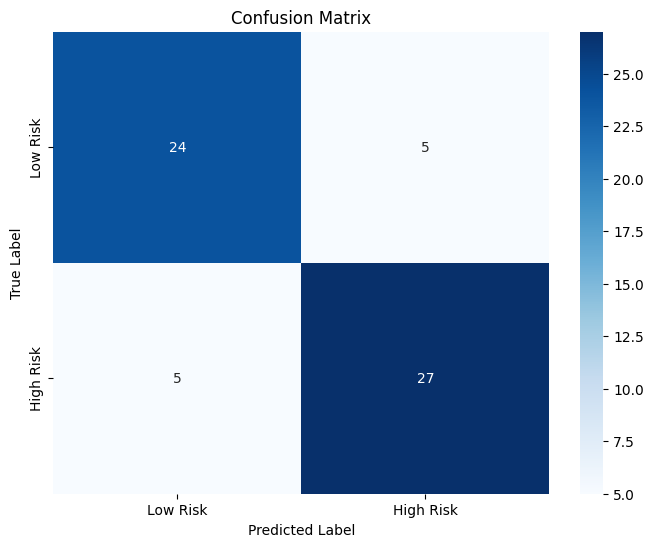

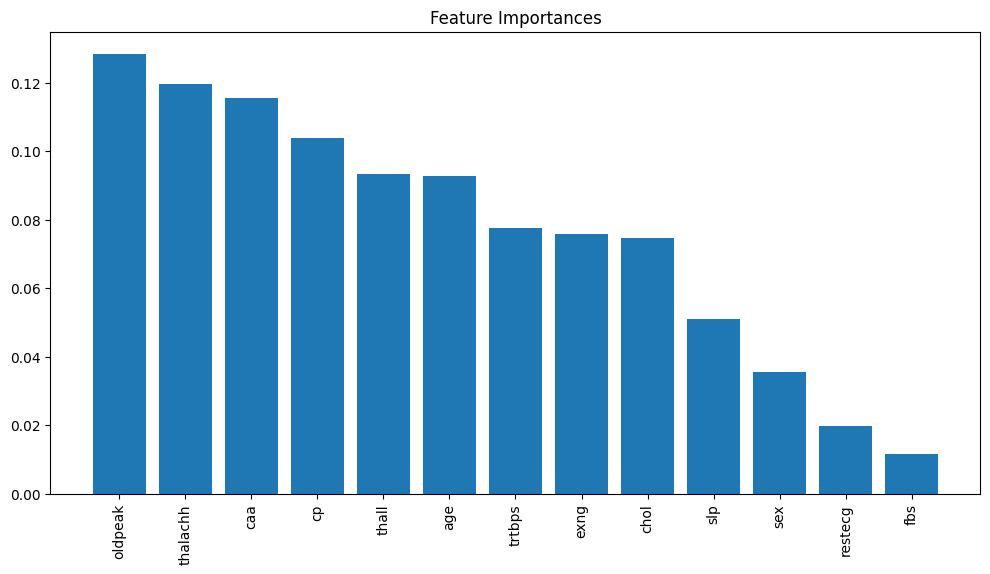

RandomForestClassifier(random_state=42)

In [37]:
def heart_classification(data):
    """
    Build a model, that would classify risk category for heart attack. 
    Visualize model on a plot.

    Args:
        data: heart medical data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data.drop('output', axis=1)
    y = data['output']
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    print(f"Accuracy: {accuracy_score(y_val, y_pred) * 100:.2f}%")
    print("\nClassification Report:\n", classification_report(y_val, y_pred))
    
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()
    
    return model

data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.